In [7]:
# Load and Explore the Data
import pandas as pd

# Load the dataset and assign column names
column_names = ['id', 'topic', 'sentiment_label', 'text']
data = pd.read_csv('./twitter_data.csv', names=column_names, header=None)

# Inspect the data
print(data.head())
print(data.info())

     id        topic sentiment_label  \
0  2401  Borderlands        Positive   
1  2401  Borderlands        Positive   
2  2401  Borderlands        Positive   
3  2401  Borderlands        Positive   
4  2401  Borderlands        Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               74682 non-null  int64 
 1   topic            74682 non-null  object
 2   sentiment_label  74682 non-null  object
 3   text             73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
N

In [8]:
print(data.columns)

Index(['id', 'topic', 'sentiment_label', 'text'], dtype='object')


In [10]:
# Step 2: Data Preprocessing - Cleaning Text
import re

# Define text cleaning function
def clean_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#','', text)
        text = re.sub(r'[^\w\s]', '', text)
        return text.lower()
    else:
        return ""  # Return an empty string if not a valid text

# Ensure text column is filled and of string type
data['text'] = data['text'].fillna("").astype(str)

# Apply the cleaning function to the text column
data['cleaned_text'] = data['text'].apply(clean_text)

# Check the result
print(data[['text', 'cleaned_text']].head())


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                        cleaned_text  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [11]:
# Remove stopwords if necessary
import nltk
from nltk.corpus import stopwords

# Download stopwords if needed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply stopwords removal
data['cleaned_text'] = data['cleaned_text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Sentiment Analysis
from textblob import TextBlob

# Apply TextBlob for sentiment analysis (to compute polarity)
data['sentiment_score'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display sentiment columns
print(data[['cleaned_text', 'sentiment_score', 'sentiment_label']].head())


                      cleaned_text  sentiment_score sentiment_label
0    im getting borderlands murder              0.0        Positive
1              coming borders kill              0.0        Positive
2      im getting borderlands kill              0.0        Positive
3     im coming borderlands murder              0.0        Positive
4  im getting borderlands 2 murder              0.0        Positive


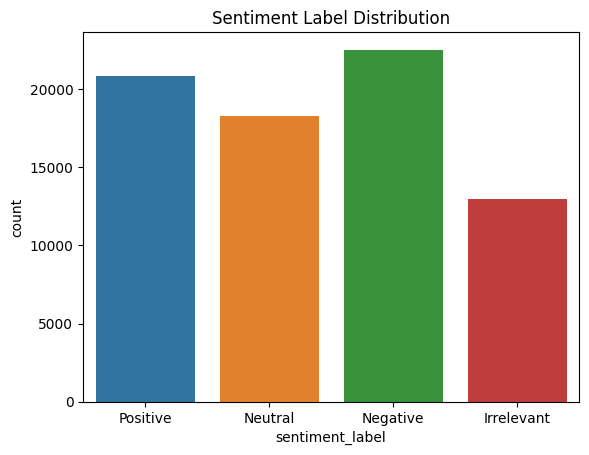

In [13]:
# Data Visualization - Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment label distribution
sns.countplot(x='sentiment_label', data=data)
plt.title('Sentiment Label Distribution')
plt.show()


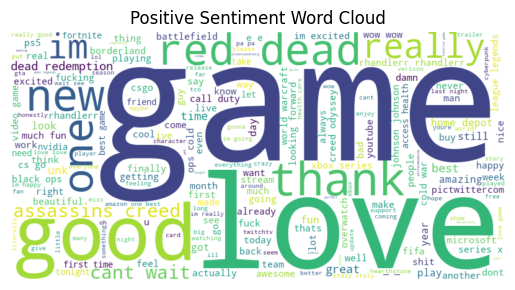

In [14]:
# Word Cloud for Positive Sentiments
from wordcloud import WordCloud

positive_words = ' '.join([text for text in data[data['sentiment_label'] == 'Positive']['cleaned_text']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()


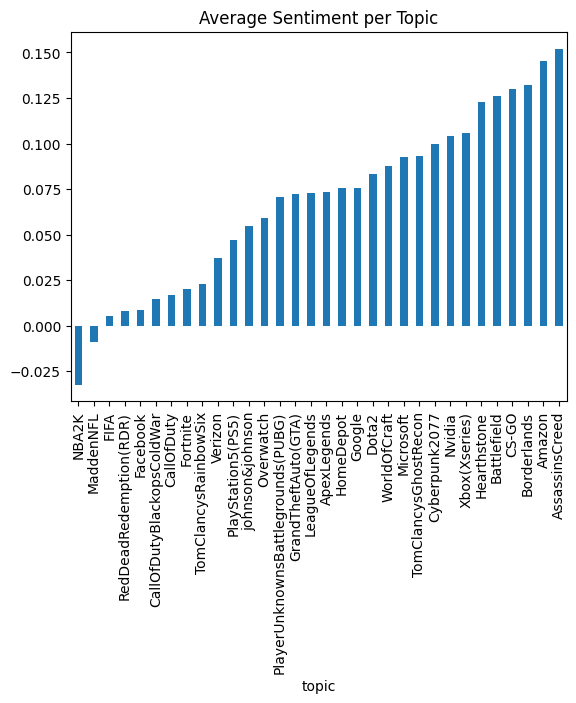

In [15]:
# Analyzing Sentiment Patterns (Optional Step Based on Dataset Features)
# Example: Grouping by topic if needed
topic_sentiment = data.groupby('topic')['sentiment_score'].mean().sort_values()
topic_sentiment.plot(kind='bar', title='Average Sentiment per Topic')
plt.show()


In [16]:
# Conclusion
# Summarize findings based on the visualizations and scores.
# Print the number of positive, negative, and neutral sentiments.
sentiment_summary = data['sentiment_label'].value_counts()
print("Sentiment Summary:")
print(sentiment_summary)


Sentiment Summary:
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: sentiment_label, dtype: int64
